In [771]:
import pandas as pd

In [772]:
file_path = "/Users/aergan/Desktop/AE/Data/online_retail/online_retail_II.csv"
data = pd.read_csv(file_path)
df = data.copy()

In [773]:
df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


## K-Means Clustering and RFM Analysis on Online Retail dataset

### RFM Analysis

RFM analysis is a powerful method used in marketing to evaluate and segment customers based on their purchasing behavior. It focuses on three key metrics:

1. Recency (R): How recently a customer made a purchase. Customers who bought recently are more likely to buy again.
2. Frequency (F): How often a customer makes a purchase. Frequent buyers are more loyal.
3. Monetary (M): How much money a customer spends. High spenders are more valuable.

RFM Focuses on:
- Customer Segmentation: Groups customers with similar behaviors together.
- Targeted Marketing: Enables personalized marketing strategies for different segments.
- Customer Value Identification: Identifies high-value customers and those at risk of churning.




In [775]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/1/2009 7:45,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,12/1/2009 7:46,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/1/2009 7:46,3.75,13085.0,United Kingdom


Frist of all, we will get rid of missing data and cancelled invoices.

In [776]:
df.shape

(525461, 8)

In [777]:
df.dropna(axis=0, how='any', inplace=True)

In [778]:
df = df[~df['Invoice'].str.startswith('C')].reset_index(drop=True)

In [779]:
df.shape

(407695, 8)

Let's handle data types

In [780]:
# Customer ID's datatype will be converted to int first, and then object.
df['Customer ID'] = df['Customer ID'].astype(int)
df['Customer ID'] = df['Customer ID'].astype(object)


In [781]:
# InvoiceDate's datatype will be converted to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format=r'%m/%d/%Y %H:%M')

In [782]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407695 entries, 0 to 407694
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  object        
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 24.9+ MB


In [783]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


**Recency**

In [784]:
df.shape

(407695, 8)

In [785]:
def low_frequency_removal(df, col, th_per):
    row_count_before = df.shape[0]
    freq = df[col].value_counts()
    th = freq.quantile(th_per)
    print(f'{col} columns lower {th_per} thresh:',th)

    outliers = freq[freq <= th].index
    df = df[~df[col].isin(outliers)]
    row_count_after = df.shape[0]
    print(f'Number of rows extracted in column {col}:', row_count_before-row_count_after, '\n')

    print(df[col].value_counts())
    print('-'*50)

    return df

In [786]:
df = low_frequency_removal(df, 'Customer ID', th_per=0.2)

Customer ID columns lower 0.2 thresh: 15.0
Number of rows extracted in column Customer ID: 7249 

Customer ID
14911    5570
17841    5043
14606    3866
14156    2648
12748    2634
         ... 
15404      16
17245      16
16481      16
12763      16
12942      16
Name: count, Length: 3401, dtype: int64
--------------------------------------------------


In [787]:
df.shape

(400446, 8)

clp: customer's latest purchases

In [788]:
df_clp = df.groupby('Customer ID').agg({'InvoiceDate': 'max'}).rename(columns={'InvoiceDate': 'LatestPurchase'})

In [789]:
df_clp

,LatestPurchase
Customer ID,
12346,2010-06-28 13:53:00
12347,2010-12-07 14:57:00
12348,2010-09-27 14:59:00
12349,2010-10-28 08:23:00
12351,2010-11-29 15:23:00
...,...
18280,2010-11-10 15:51:00
18283,2010-11-22 15:30:00
18284,2010-10-04 11:33:00


In [790]:
print('Latest invoice date:', df['InvoiceDate'].max())

Latest invoice date: 2010-12-09 20:01:00


In [791]:
# So we can assume that today is
today = pd.to_datetime('2010-12-10 00:00')

In [792]:
df_clp['Recency'] = (today - df_clp['LatestPurchase']).dt.days

In [793]:
df_clp

,LatestPurchase,Recency
Customer ID,,
12346,2010-06-28 13:53:00,164
12347,2010-12-07 14:57:00,2
12348,2010-09-27 14:59:00,73
12349,2010-10-28 08:23:00,42
12351,2010-11-29 15:23:00,10
...,...,...
18280,2010-11-10 15:51:00,29
18283,2010-11-22 15:30:00,17
18284,2010-10-04 11:33:00,66


In [794]:
df_clp.reset_index(inplace=True)

**Frequency**

In [795]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


ctp: customer's total purchases

In [796]:
df_ctp = df.groupby('Customer ID').agg({'Invoice': 'count'}).rename(columns={'Invoice': 'Frequency'}).reset_index()

In [797]:
df_ctp

,Customer ID,Frequency
0,12346,33
1,12347,71
2,12348,20
3,12349,102
4,12351,21
...,...,...
3396,18280,20
3397,18283,230
3398,18284,28
3399,18286,67


**Monetary**

In [798]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [799]:
df['Invoice Amount'] = df['Quantity'] * df['Price']

cts: customer total spent

In [800]:
df_cts = df.groupby('Customer ID').agg({'Invoice Amount':'sum'}).rename(columns={'Invoice Amount': 'Monetary'}).reset_index()

In [801]:
df_cts

,Customer ID,Monetary
0,12346,372.86
1,12347,1323.32
2,12348,222.16
3,12349,2671.14
4,12351,300.93
...,...,...
3396,18280,307.55
3397,18283,641.77
3398,18284,461.68
3399,18286,1296.43


**Recency Frequency Monetary (RFM) Score**

**df_clp**: Customer's Latest Purchases

**df_ctp**: Customer's Total Purchases

**df_cts**: Customer's Total Spents


In [802]:
df_clp.head(3)

,Customer ID,LatestPurchase,Recency
0,12346,2010-06-28 13:53:00,164
1,12347,2010-12-07 14:57:00,2
2,12348,2010-09-27 14:59:00,73


In [803]:
df_ctp.head(3)

,Customer ID,Frequency
0,12346,33
1,12347,71
2,12348,20


In [804]:
df_cts.head(3)


,Customer ID,Monetary
0,12346,372.86
1,12347,1323.32
2,12348,222.16


In [805]:
df_RFM = pd.merge(left=df_clp, right=df_ctp, on='Customer ID')\
.merge(right=df_cts, on='Customer ID').loc[:, ['Customer ID', 'Recency', 'Frequency', 'Monetary']]


In [806]:
df_RFM

,Customer ID,Recency,Frequency,Monetary
0,12346,164,33,372.86
1,12347,2,71,1323.32
2,12348,73,20,222.16
3,12349,42,102,2671.14
4,12351,10,21,300.93
...,...,...,...,...
3396,18280,29,20,307.55
3397,18283,17,230,641.77
3398,18284,66,28,461.68
3399,18286,111,67,1296.43


In [807]:
df_RFM['R Score'] = pd.qcut(df_RFM['Recency'], 5, labels=[5,4,3,2,1])
df_RFM['F Score'] = pd.qcut(df_RFM['Frequency'].rank(method='first'), 5, labels=[5,4,3,2,1])
df_RFM['M Score'] = pd.qcut(df_RFM['Monetary'], 5, labels=[5,4,3,2,1])

df_RFM['RFM Score'] = df_RFM['R Score'].astype(str) + df_RFM['F Score'].astype(str) + df_RFM['M Score'].astype(str)

df_RFM['RFM Cluster'] = pd.qcut(df_RFM['RFM Sum'], 5, labels=[5,4,3,2,1])

In [808]:
df_RFM

,Customer ID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Sum,RFM Score
0,12346,164,33,372.86,1,4,5,10,145
1,12347,2,71,1323.32,5,3,2,10,532
2,12348,73,20,222.16,2,5,5,12,255
3,12349,42,102,2671.14,3,2,1,6,321
4,12351,10,21,300.93,5,5,5,15,555
...,...,...,...,...,...,...,...,...,...
3396,18280,29,20,307.55,3,5,5,13,355
3397,18283,17,230,641.77,4,1,4,9,414
3398,18284,66,28,461.68,2,4,4,10,244
3399,18286,111,67,1296.43,2,3,3,8,233


#### Visualization for RFM Clusterning

In [809]:
import seaborn as sns
import matplotlib.pyplot as plt

In [810]:
df_RFM_Sum_count = df_RFM.groupby('RFM Sum')['Customer ID'].count().reset_index(name='counts')

In [811]:
df_RFM_Sum_count

,RFM Sum,counts
0,3,9
1,4,52
2,5,158
3,6,294
4,7,485
5,8,450
6,9,505
7,10,469
8,11,461
9,12,263


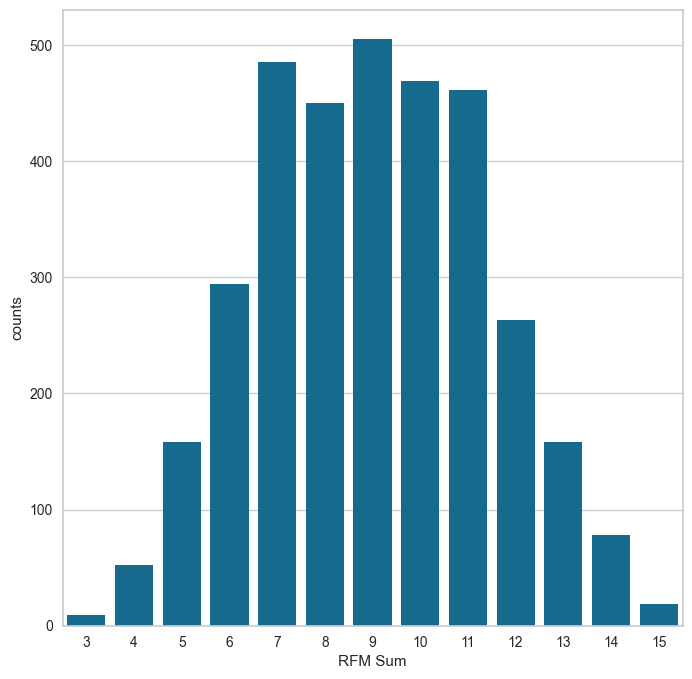

In [812]:
plt.figure(figsize=(8,8))
sns.barplot(data=df_RFM_Sum_count, x='RFM Sum', y='counts');

In [ ]:
def clustering(x):
    if x in [3,4,5,6,7]: return 0
    elif x in [8,9,10]: return 1
    else: return 2

In [813]:
df_RFM.loc[:, ['RFM Sum']].describe()

,RFM Sum
count,3401.000000
mean,9.019994
std,2.365726
min,3.000000
25%,7.000000
50%,9.000000
75%,11.000000
max,15.000000


/var/folders/n1/1g5jtzfn6zdfx68rz3wj2gzcm45wp7/T/ipykernel_20899/2320349248.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_RFM_Sum_count = df_RFM.groupby('R Score')['Customer ID'].count().reset_index(name='counts')


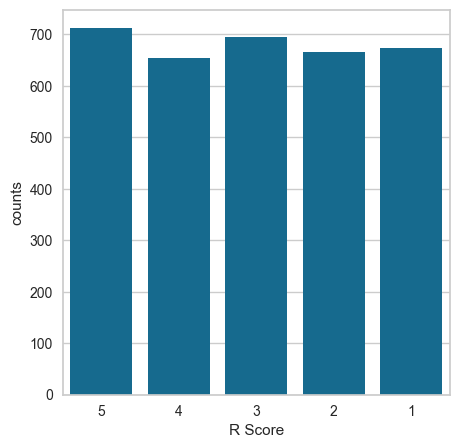

In [814]:
df_RFM_Sum_count = df_RFM.groupby('R Score')['Customer ID'].count().reset_index(name='counts')

plt.figure(figsize=(5,5))
sns.barplot(data=df_RFM_Sum_count, x='R Score', y='counts');

/var/folders/n1/1g5jtzfn6zdfx68rz3wj2gzcm45wp7/T/ipykernel_20899/2938136757.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_RFM_Sum_count = df_RFM.groupby('F Score')['Customer ID'].count().reset_index(name='counts')


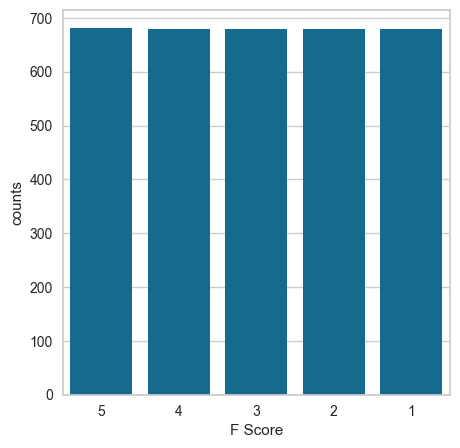

In [815]:
df_RFM_Sum_count = df_RFM.groupby('F Score')['Customer ID'].count().reset_index(name='counts')

plt.figure(figsize=(5,5))
sns.barplot(data=df_RFM_Sum_count, x='F Score', y='counts');

/var/folders/n1/1g5jtzfn6zdfx68rz3wj2gzcm45wp7/T/ipykernel_20899/1093477964.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_RFM_Sum_count = df_RFM.groupby('M Score')['Customer ID'].count().reset_index(name='counts')


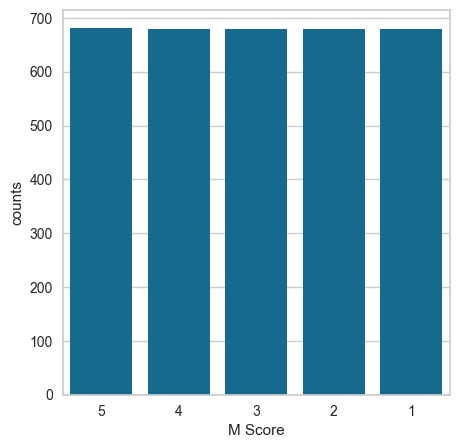

In [816]:
df_RFM_Sum_count = df_RFM.groupby('M Score')['Customer ID'].count().reset_index(name='counts')

plt.figure(figsize=(5,5))
sns.barplot(data=df_RFM_Sum_count, x='M Score', y='counts');

### K-Means Clustering

Find optimal 'K' value with Elbow approach

In [817]:
df_RFM.head()

,Customer ID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Sum,RFM Score
0,12346,164,33,372.86,1,4,5,10,145
1,12347,2,71,1323.32,5,3,2,10,532
2,12348,73,20,222.16,2,5,5,12,255
3,12349,42,102,2671.14,3,2,1,6,321
4,12351,10,21,300.93,5,5,5,15,555


In [818]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Customer ID  3401 non-null   int64   
 1   Recency      3401 non-null   int64   
 2   Frequency    3401 non-null   int64   
 3   Monetary     3401 non-null   float64 
 4   R Score      3401 non-null   category
 5   F Score      3401 non-null   category
 6   M Score      3401 non-null   category
 7   RFM Sum      3401 non-null   int64   
 8   RFM Score    3401 non-null   object  
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 170.1+ KB


In [819]:
df_RFM['R Score'] = df_RFM['R Score'].astype(int)
df_RFM['F Score'] = df_RFM['F Score'].astype(int)
df_RFM['M Score'] = df_RFM['M Score'].astype(int)

In [820]:
df_RFM.dtypes

Customer ID      int64
Recency          int64
Frequency        int64
Monetary       float64
R Score          int64
F Score          int64
M Score          int64
RFM Sum          int64
RFM Score       object
dtype: object

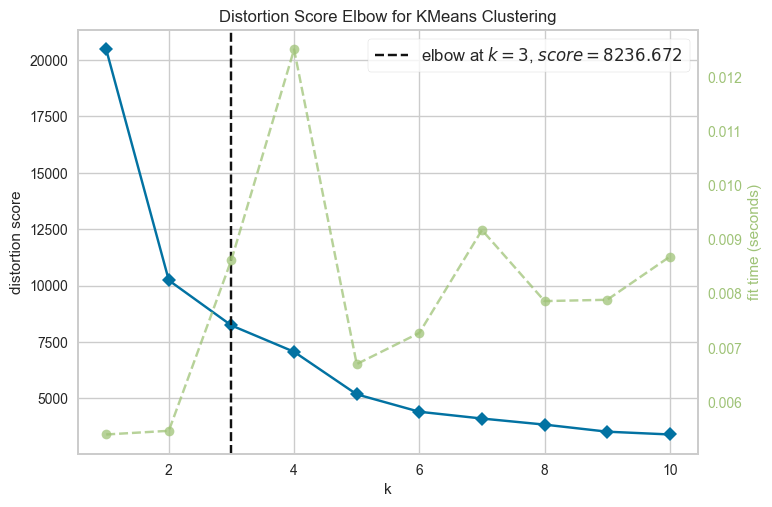

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [821]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

X = df_RFM[['R Score', 'F Score', 'M Score']]

visualizer.fit(X)
visualizer.poof()

In [822]:
K = 3

model = KMeans(
    n_clusters = K, 
    init= 'k-means++',
    random_state=1)

model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [823]:
df_RFM['KMeans Clusters'] = model.fit_predict(X)

In [824]:
df_RFM

,Customer ID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Sum,RFM Score,KMeans Clusters
0,12346,164,33,372.86,1,4,5,10,145,2
1,12347,2,71,1323.32,5,3,2,10,532,1
2,12348,73,20,222.16,2,5,5,12,255,2
3,12349,42,102,2671.14,3,2,1,6,321,3
4,12351,10,21,300.93,5,5,5,15,555,0
...,...,...,...,...,...,...,...,...,...,...
3396,18280,29,20,307.55,3,5,5,13,355,0
3397,18283,17,230,641.77,4,1,4,9,414,1
3398,18284,66,28,461.68,2,4,4,10,244,2
3399,18286,111,67,1296.43,2,3,3,8,233,3


,Customer ID,KMeans Clusters
0,12346,2
2,12348,2
7,12355,2
13,12361,2
14,12368,2
...,...,...
3388,18264,2
3389,18267,2
3391,18271,2
3393,18275,2


In [840]:
for i in range(0,4):
    print(df_RFM[df_RFM['KMeans Clusters'] == i][['Customer ID', 'RFM Sum', 'KMeans Clusters']].head(20))
    print('-'*50)

     Customer ID  RFM Sum  KMeans Clusters
4          12351       15                0
5          12352       15                0
6          12353       13                0
22         12379       10                0
28         12393       11                0
31         12399       10                0
32         12402       10                0
36         12411       13                0
41         12419       13                0
42         12421       13                0
44         12423       11                0
51         12434       14                0
57         12445       13                0
58         12450       11                0
72         12475       12                0
83         12492       12                0
84         12494       13                0
89         12505       10                0
103        12537       10                0
109        12553       11                0
--------------------------------------------------
    Customer ID  RFM Sum  KMeans Clusters
1   